In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [5]:
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv('iris.data', header = None, names = column_names)

X = df.drop("class", axis=1)
y = df["class"]

# Dividir o conjunto de dados em treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, stratify=y, random_state=69)

# Realizar a padronização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Criar modelo de regressão logística
model = LogisticRegression(multi_class='auto', solver='lbfgs')

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Calcular a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia:", acuracia)

Acurácia: 0.837037037037037


In [7]:
# Calcule a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Calcule as métricas com base na matriz de confusão
total_samples = cm.sum()

accuracy = cm.diagonal().sum() / total_samples

precision = cm.diagonal() / cm.sum(axis=0)
precision = precision.mean()

recall = cm.diagonal() / cm.sum(axis=1)
recall = recall.mean()

f1 = 2 * (precision * recall) / (precision + recall)

# Imprima as métricas e a matriz de confusão
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-measure:", f1)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.837037037037037
Precision: 0.8373742371763154
Recall: 0.837037037037037
F1-measure: 0.8372056031532695
Confusion Matrix:
[[45  0  0]
 [ 0 35 10]
 [ 0 12 33]]


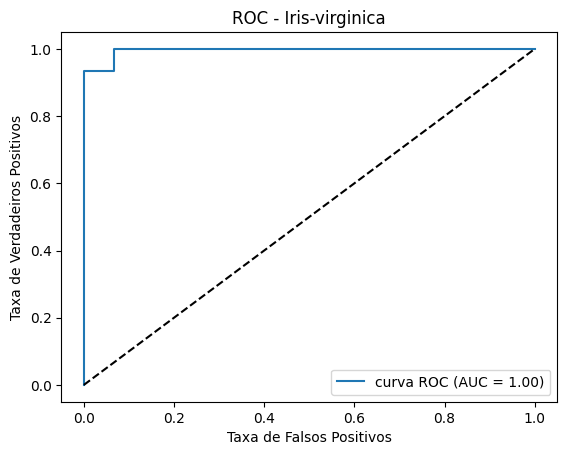

AUC: 0.9955555555555555


In [9]:
# Converta a variável alvo em binário (0 ou 1) para a classe 'Iris-virginica'
y_binary = (y == 'Iris-virginica').astype(int)

# Divida os dados em conjuntos de treinamento e teste
X_trainb, X_testb, y_trainb, y_testb = train_test_split(X, y_binary, test_size=0.3, stratify=y_binary, random_state=42)

# Aplique a padronização aos dados de treinamento e teste
scaler = StandardScaler()
X_train_scaledb = scaler.fit_transform(X_trainb)
X_test_scaledb = scaler.transform(X_testb)

# Crie um modelo de Regressão Logística para classificação binária
model_binary = LogisticRegression(multi_class='auto', solver='lbfgs')

# Treine o modelo com os dados padronizados
model_binary.fit(X_train_scaledb, y_trainb)

# Obtenha as probabilidades previstas para a classe positiva (Iris-virginica)
y_scoreb = model_binary.predict_proba(X_test_scaledb)[:, 1]

# Calcule a curva ROC e a área sob a curva (AUC) para Iris-virginica
fpr, tpr, thresholds = roc_curve(y_testb, y_scoreb)
auc = roc_auc_score(y_testb, y_scoreb)

# Plote a curva ROC
plt.plot(fpr, tpr, label='curva ROC (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Curva do classificador aleatório
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('ROC - Iris-virginica')
plt.legend(loc='lower right')
plt.show()

print("AUC:", auc)